In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load dataset
data = pd.read_csv('/Users/shaneab/Projects/Machine Learning/Expression recognition/fer20131.csv')
X = np.array([np.fromstring(pixel, dtype=int, sep=' ') for pixel in data['pixels']])
y = data['emotion'].values


In [3]:
# Normalize pixel values
X = X / 255.0

In [4]:
#Normalisasi Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.60646962, -0.4562069 , -0.4011047 , ..., -0.08714567,
        -0.05788751, -0.41197523],
       [ 0.37587539,  0.40796695,  0.41422283, ...,  1.03537587,
         0.88911749,  0.88301341],
       [ 1.34609268,  1.17337807,  0.52711433, ..., -0.3193915 ,
        -0.04509014,  0.47674246],
       ...,
       [-1.24923857, -1.23396336, -1.22897574, ...,  0.53217656,
         0.24924925, -0.01840025],
       [-1.09157826, -1.09816461, -1.07845373, ..., -1.00322646,
        -1.06887933, -1.09755746],
       [-1.22498314, -1.28334472, -1.25406274, ...,  0.98376568,
         1.09387532,  1.09884485]])

In [5]:
# Reduce dimensionality with PCA
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X_scaled)

In [6]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
X_train


array([[-2.32406411e+01, -1.15759865e+01,  1.41389042e+01, ...,
        -1.78695089e+00,  5.01686526e-01, -3.27767249e+00],
       [-1.92852173e+01,  6.41154315e+00,  3.16600425e+01, ...,
         2.51078953e+00,  8.23944587e-01, -2.59479097e+00],
       [ 2.32689529e+01, -2.38533495e+01, -6.94569126e+00, ...,
         2.85876987e-01, -1.32272603e+00, -1.27127429e+00],
       ...,
       [-1.56039775e+01,  1.70759424e+00,  1.79209842e+00, ...,
         2.93130863e-01, -7.95440256e-01,  2.17081348e+00],
       [ 2.59941832e+01,  4.57945957e+00, -1.01665321e+01, ...,
         1.53237004e-01,  1.95003524e-02,  7.80961016e-01],
       [-7.21538498e+01,  7.76697874e+00,  2.00959685e+01, ...,
        -7.85529949e-01,  1.96030367e-01, -2.90241294e-01]])

In [7]:
# Grid Search
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}
knn_model = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_model.fit(X_train, y_train)
print("Best Parameters:", knn_model.best_params_)

Best Parameters: {'n_neighbors': 1}


In [8]:
# Make Prediciton
best_knn = knn_model.best_estimator_
best_knn
y_pred = best_knn.predict(X_test)
y_pred

array([3, 3, 2, ..., 3, 6, 2])

In [9]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.422680412371134
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.34      0.36       985
           1       0.36      0.60      0.45       102
           2       0.43      0.43      0.43      1043
           3       0.47      0.45      0.46      1765
           4       0.37      0.35      0.36      1210
           5       0.57      0.59      0.58       795
           6       0.35      0.40      0.37      1278

    accuracy                           0.42      7178
   macro avg       0.42      0.45      0.43      7178
weighted avg       0.42      0.42      0.42      7178



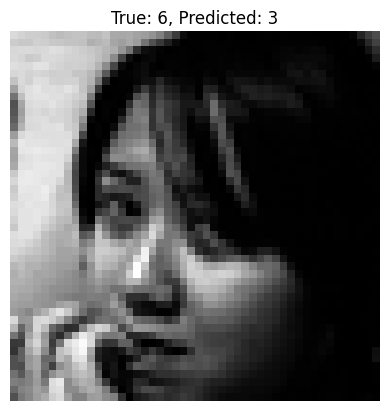

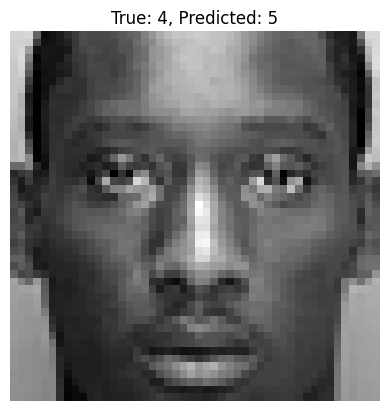

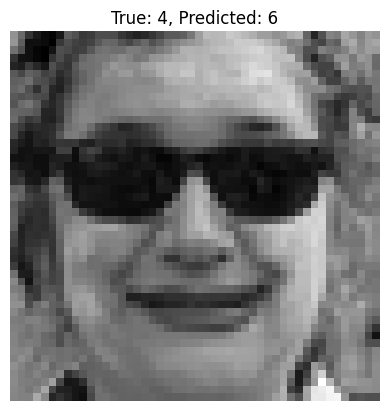

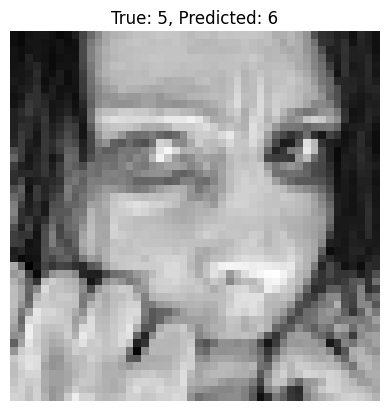

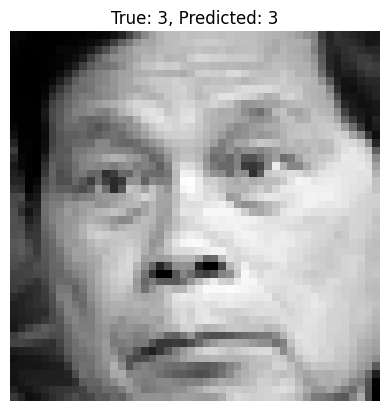

In [18]:
# Load raw pixel data for visualization
X_raw = np.array([np.fromstring(pixel, dtype=int, sep=' ') for pixel in data['pixels']])

# Visualize random predictions using raw data
for i in range(5):
    idx = np.random.randint(0, len(X_test))  # Random index within the test set
    image = X_raw[X_train.shape[0] + idx].reshape(48, 48)  # Map to the original dataset
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {y_test[idx]}, Predicted: {y_pred[idx]}")
    plt.axis('off')
    plt.show()
